# 1. Hypersphere

$n$차원에서의 구를 초구(hypershpere)라고 한다. 반지름이 $r$인 2차원 구의 부피(면적)은 $S_2=\pi r^2$, 3차원은 $S_3=\frac{4}{3} \pi r^3$이다. 이를 확장하여 4차원, 5차원 구의 부피를 몬테카를로 방법을 이용하여 추측해보자.

$n$차원 구의 부피는 $S_n = C_n r^n$이다.
따라서 반지름이 1인 구를 생각하면 $S_n=C_n$과 같다.
몬테카를로 방법을 이용한 2차원 원의 면적 문제를 응용하여 3, 4, 5차원에서 $C_n$의 근사값을 구하여라

1. 3차원

In [1]:
import random
import numpy as np

def s_circle(n):
    count=0
    for i in range(n):
        x,y,z=random.random(), random.random(), random.random()
        if x*x+y*y+z*z<1:
            count+=1
    return 8*count/n

In [2]:
s_circle(100),s_circle(1000)

(4.32, 4.368)

2. 4차원

In [3]:
import random
import numpy as np

def s_circle(n):
    count=0
    for i in range(n):
        x,y,z,w=random.random(), random.random(), random.random(), random.random()
        if x*x+y*y+z*z+w*w<1:
            count+=1
    return 16*count/n

In [4]:
s_circle(100), s_circle(1000)

(5.44, 4.736)

3. 5차원

In [5]:
import random
import numpy as np

def s_circle(n):
    count=0
    for i in range(n):
        x,y,z,w,q =random.random(), random.random(), random.random(), random.random(), random.random()
        if x*x+y*y+z*z+w*w+q*q<1:
            count+=1
    return 32*count/n

In [6]:
s_circle(100), s_circle(1000)

(6.72, 6.112)

# 2. Particles in a box

1차원 무한히 깊은 퍼텐셜 상자 (길이 $L$) 안에 있는 양자 입자를 생각해 봅시다. 가능한 에너지 상태는 다음과 같습니다.

$$ E_n = \frac{\pi^2 \hbar^2}{2m L^2} n^2.$$
상호작용하지 않는 입자 총 $N=1000$개가 박스 안에 들어있다고 가정합시다. 또한 문제를 간단히 하기 위해 $2m=\hbar=1$, $L=\pi$로 가정합시다. 그러면$$ E_n = n^2.$$

열적 요동에 의해 입자들은 각자 에너지 상태가 바뀔 수 있습니다. 단 열적 요동이 아주 크지는 않아서 상태는 한 단계씩만 변화한다고 가정해봅시다. 그렇다면 무작위로 고른 하나의 입자의 상태가 바뀌어 에너지 고유값이 한 단계 증가했다면 그 때 에너지 차이는 다음과 같습니다.$$ \Delta E = (n+1)^2- (n)^2 = ( 2 n +1)$$비슷한 방식으로 에너지가 감소했다면 에너지 차이는 다음과 같습니다.$$ \Delta E =( -2 n +1)$$

초기에 모든 입자가 바닥상태(n=1)에 존재하고 있었다고 가정하고 메트로폴리스 알고리즘을 이용하여 온도($\beta$)를 바꾸어가면서

1.총 에너지 $\sum_{i=1}^{N} E_n = \sum_i n_i^2$

2.에너지에 따른 입자의 분포를 측정해 봅시다. (즉 볼츠만 분포를 따르는지)


구체적인 알고리즘은 다음과 같습니다.

1.$N$개의 입자 중에 무작위로 하나를 고른다. 고른 입자를 $i$라고 부르자.

2.입자 $i$의 상태와 에너지를 확인한다. 이를 각각 $n_i$와 $E_i$이라고 하자.

3.고른 입자 $i$의 나중 에너지 상태를 선택한다. 즉, $1/2$ 확률로 $n_i+1$, 나머지 $1/2$ 확률로 $n_i-1$을 선택한다. 단 입자 $i$가 바닥상태 (에너지가 $E_1$인 상태)에 존재했다면 $1/2$ 확률로 바닥상태에 그대로 머무르고 $1/2$ 확률로 에너지가 $E_2$인 상태로 바꾸기를 시도한다.

4.입자의 상태를 변화했을 때 에너지를 확인하자. 이를 $E_f$라고 하고 에너지 차이를 구한다. $\Delta E=E_f-E_i$

5.만약 $\Delta E \le 0$이면 1의 확률로(즉 항상) 상태를 $i$에서 $f$로 바꾼다.

6.만약 $\Delta E \gt 0$이면 $e^{-\beta \Delta E}$의 확률로 상태를 $f$로 바꾼다. 즉 0과 1사이의 랜덤넘버를 하나 구해서 이 값이 앞의 확률보다 낮으면 상태를 바꾼다.

7.이 과정을 반복한다.

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


def aveE1(b1,n):
    states = np.ones(n)
    for t in range(n*100):
        i=random.randint(0,n-1)
        DE = -2*states[i]+1
        if DE<0:
            states[i]=-1*states[i]
        elif random.random()<np.exp(-b1*DE):
            states[i]=-1*states[i]
    return sum(states)

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


def aveE2(b2,n):
    states = np.ones(n)
    for t in range(n*100):
        i=random.randint(0,n-1)
        DE = -2*states[i]+1
        if DE<0:
            states[i]=-1*states[i]
        elif random.random()<np.exp(-b2*DE):
            states[i]=-1*states[i]
    return sum(states)

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


def aveE3(b3,n):
    states = np.ones(n)
    for t in range(n*100):
        i=random.randint(0,n-1)
        DE = -2*states[i]+1
        if DE<0:
            states[i]=-1*states[i]
        elif random.random()<np.exp(-b3*DE):
            states[i]=-1*states[i]
    return sum(states)

In [14]:
temp1=np.arange(1,20,2)
y1=[aveE1(1/t,1000) for t in temp1]
b1=np.arange(1/20,1,0.1)
th1=-1000*np.tanh(1/temp1)


temp2=np.arange(1,20,2)
y2=[aveE2(1/t,1000) for t in temp2]
b2=np.arange(1,1.95,0.1)
th2=-1000*np.tanh(1/temp2)

temp3=np.arange(1,20,2)
y3=[aveE3(1/t,1000) for t in temp3]
b3=np.arange(2,2.95,0.1)
th3=-1000*np.tanh(1/temp3)

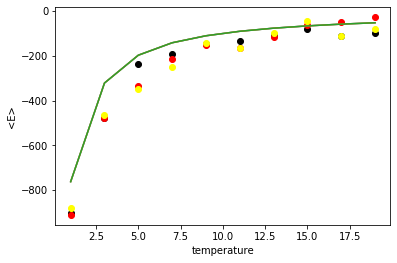

In [15]:
plt.xlabel('temperature')
plt.ylabel('<E>')

plt.plot(temp1,y1,'o',color='black');
plt.plot(temp1,th1)
plt.plot(temp2,y2,'o',color='red');
plt.plot(temp2,th2)
plt.plot(temp3,y3,'o',color='yellow');
plt.plot(temp3,th3)

입자 박스(-6)